<img src=https://www.mayflower.com/wp-content/uploads/2022/04/NYC_Header-100-scaled.jpg width="900">

Dados:
*   https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market
*   https://www.kaggle.com/datasets/felipeliskepandando/all-ny-shoreline
*   https://www.kaggle.com/datasets/felipeliskepandando/nyc-ver1


Este Notebook contém um projeto de análise e visualização de dados referentes a anúncios em sites do mercado imobiliário de NY, tendo como objetivo expor de forma guiada algumas das atividades que competem à ciência de dados, veremos:
- Preparação dos dados
- Entendimento das variáveis através de análises descritivas e gráficas
- Aplicação de modelos simples de machine learning (KNN e regressão linear)

Sugiro que iniciantes acompanhem os passos deste notebook de modo a orientar seus projetos

**Dito isso, vamos começar!**

In [1]:
# Bibliotecas comuns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Carregando e entendendo os dados
vamos começar usando a biblioteca pandas (abreviada por "pd") para carregar os dados de um arquivo CSV na estrutura de um DataFrame:

In [2]:
# Criamos o dataframe "df" com nossos dados
df = pd.read_csv("/kaggle/input/new-york-housing-market/NY-House-Dataset.csv")

In [3]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


In [4]:
# linhas x colunas
df.shape

(4801, 17)

In [5]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [6]:
# Tipo de dado em cada coluna
df.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [7]:
# Estatísticas descritivas para variáveis numéricas
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [8]:
df.nunique() # num entradas únicas por coluna

BROKERTITLE                    1036
TYPE                             13
PRICE                          1274
BEDS                             27
BATH                             22
PROPERTYSQFT                   1445
ADDRESS                        4582
STATE                           308
MAIN_ADDRESS                   4583
ADMINISTRATIVE_AREA_LEVEL_2      29
LOCALITY                         11
SUBLOCALITY                      21
STREET_NAME                     174
LONG_NAME                      2731
FORMATTED_ADDRESS              4550
LATITUDE                       4196
LONGITUDE                      4118
dtype: int64

### Localizando repetições

É possível que os dados sobre os imóveis tenham sido coletados de diversos sites, de modo que existam imóveis com a mesma oferta disponível em vários lugares. Vamos checar se há entradas duplicadas; para isto podemos usar a função ".duplicated()" que compara todas as colunas, linha por linha, apontando determinada entrada como repetida caso ela seja _exatamente igual_ a alguma outra entrada anterior.

Quando se trabalha com uma base de dados é comum que exista uma varíavel ID, que identifique de forma única cada entrada do conjunto de dados (uma "Primary Key", em termos de bancos de dados relacionais como SQL). Se tivermos uma coluna ID, basta comparar tais valores (e não todas as colunas, o que pode ser custoso em um banco de dados muito grande).

Como não é este o caso, optei por usar as colunas 'LATITUDE' e 'LONGITUDE' para, em conjunto, determinar um coordenada única, isto é, vamos considerar duplicadas todas as entradas que apresentarem os mesmo valores de latitude e longitude que uma outra entrada já presente no DataFrame. Isto é feito adicionando-se o parâmetro **subset**:

In [9]:
df.duplicated(subset=['LATITUDE', 'LONGITUDE'])

0       False
1       False
2       False
3       False
4       False
        ...  
4796    False
4797     True
4798    False
4799     True
4800    False
Length: 4801, dtype: bool

A saída da função avalia se a entrada é uma duplicata (True) ou não (False), ao localizar as marcadas como True com .loc() como em:

    .loc( --- duplicated aqui --- )
veremos um Dataframe contendo todas as entradas repetidas:


In [10]:
# Localizando as entradas repetidas
df.loc[df.duplicated(subset=['LATITUDE', 'LONGITUDE'])]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
36,Brokered by Ashford Homes,Multi-family home for sale,1299888,11,4.000000,3156.000000,310-312 Hillside Ave,"Staten Island, NY 10304","310-312 Hillside AveStaten Island, NY 10304",New York,Richmond County,Staten Island,Clifton,310,"310 Hillside Ave #312, Staten Island, NY 10304...",40.615567,-74.086955
72,Brokered by Serhant,Condo for sale,1175000,2,2.000000,1115.000000,924 Lafayette Ave Apt 2,"Brooklyn, NY 11221","924 Lafayette Ave Apt 2Brooklyn, NY 11221",New York,Kings County,Brooklyn,Bedford-Stuyvesant,924,"924 Lafayette Ave #2, Brooklyn, NY 11221, USA",40.691514,-73.935444
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
102,Built by Toll Brothers,For sale,2280000,2,2.000000,1400.000000,The Rockwell # 6E,"New York, NY 10025","The Rockwell # 6ENew York, NY 10025",United States,New York,New York County,New York,West 103rd Street,"218 W 103rd St, New York, NY 10025, USA",40.798658,-73.967904
115,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4780,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714
4782,Brokered by Sotheby's International Realty - E...,Condo for sale,2600000,3,2.000000,1729.000000,242 E 15th St Apt 1,"New York, NY 10003","242 E 15th St Apt 1New York, NY 10003",New York,New York County,New York,Manhattan,242,"242 E 15th St APT 1, New York, NY 10003, USA",40.733031,-73.985037
4789,Brokered by New York Way Real Estate Corp,Co-op for sale,285000,1,1.000000,2184.207862,51-42 30 Ave Unit 2,"Woodside, NY 11377","51-42 30 Ave Unit 2Woodside, NY 11377",New York,Queens County,Queens,Woodside,51-42,"51-42 30th Ave. #2, Woodside, NY 11377, USA",40.758694,-73.904916
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152


A função retornou um DataFrame não-vazio! (o que ocorreria caso não houvessem duplicatas)

Veja que temos 601 entradas duplicadas, podemos excluí-las com:

In [11]:
df.drop_duplicates(subset=['LATITUDE', 'LONGITUDE'], inplace = True)

 Algumas destas variáveis são redundantes ou não são de interesse para a análise, por esta razão, vamos utilizar o método "drop" para remover as colunas que não serão utilizadas

In [12]:
df = df.drop(['ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME', 'FORMATTED_ADDRESS', 'STATE',
              'STREET_NAME', 'SUBLOCALITY', 'ADMINISTRATIVE_AREA_LEVEL_2'], axis=1)
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,New York,40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,New York,40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,New York,40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,New York,40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,New York,40.767224,-73.969856
...,...,...,...,...,...,...,...,...,...
4794,Brokered by Brown Harris Stevens,Condo for sale,945000,2,2.000000,903.000000,New York County,40.816711,-73.942050
4795,Brokered by RE MAX Edge,Multi-family home for sale,2999999,15,9.000000,3600.000000,New York,40.578450,-73.982739
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.000000,2184.207862,New York County,40.774350,-73.955879
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.000000,2184.207862,New York,40.745882,-74.003398


### Buscando valores nulos e dados faltantes
documentação:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [13]:
# Mostra o total de valores nulos em cada coluna
df.isna().sum()

BROKERTITLE     0
TYPE            0
PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
LOCALITY        0
LATITUDE        0
LONGITUDE       0
dtype: int64

Esta é uma base "bem comportada", não há nada a ser feito aqui. Esteja ciente que na maioria dos casos será necessário tratar dados faltantes:
    
      Deletar NA:  df = df.dropna()
      Preencher NA: df = df.fillna(value=X)
                         
no segundo caso é possível considerar o tratamento de valores faltantes ao substituí-los pela média ou a mediana dos valores da coluna em questão, bastando guardar tal valor em um objeto e usar no lugar de X em value=X

Um exemplo mais realista...

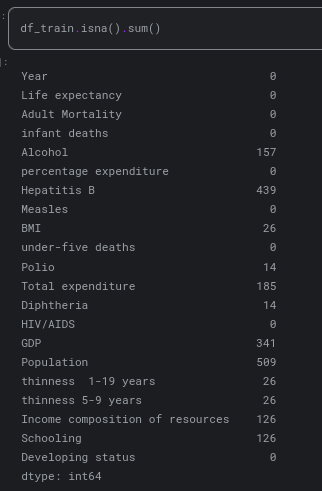

### Visualizando e tratando as outras features

#### Type

In [14]:
df['TYPE'].describe()

count               4200
unique                13
top       Co-op for sale
freq                1156
Name: TYPE, dtype: object

In [15]:
df['TYPE'].value_counts()

TYPE
Co-op for sale                1156
House for sale                 957
Condo for sale                 727
Multi-family home for sale     696
Townhouse for sale             284
Pending                        215
Contingent                      81
Land for sale                   47
For sale                        17
Foreclosure                     14
Condop for sale                  3
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64

"Co-op" ultrapassa o num de casas, vale a pena conhecer seus dados: https://www.nerdwallet.com/article/mortgages/what-is-a-co-op


Essa variável categórica é interessante para analisar tendências como o valor do imóvel, metragem ou até o número de quartos.
Dito isso não usaremos as entradas como "Pending", "Coming Soon", etc

In [16]:
tipos_remover = ['Pending','Contingent','For sale','Foreclosure','Coming Soon']
df = df[~df['TYPE'].isin(tipos_remover)] # Deixando no df apenas as linhas cujo valor na coluna "TYPE" não se encontra na lista "Tipos_remover"

In [17]:
# Conferindo tamanho do dataset após remoção
df['TYPE'].describe()

count               3871
unique                 8
top       Co-op for sale
freq                1156
Name: TYPE, dtype: object

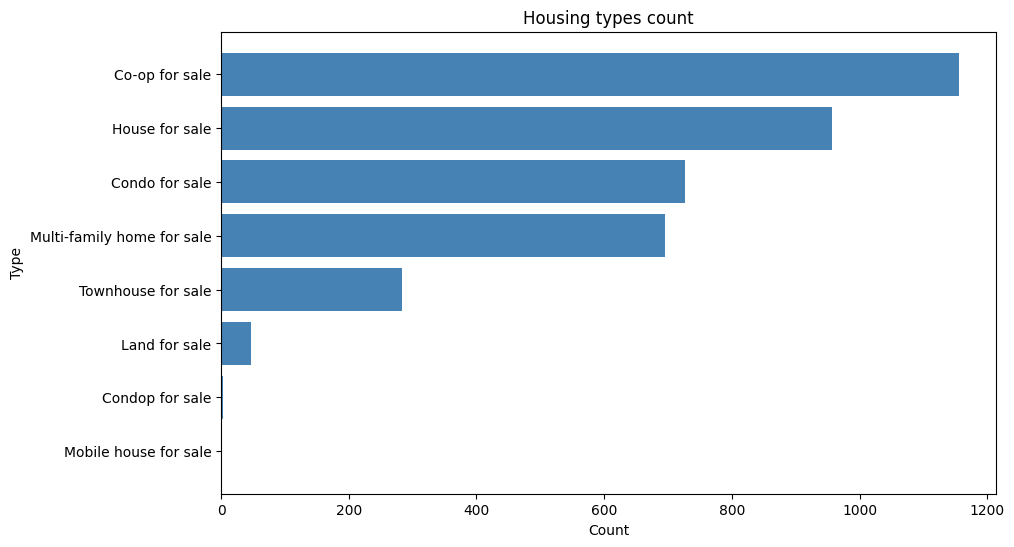

In [18]:
# Gráfico de Barras simples
count = df['TYPE'].value_counts().reset_index()
count.columns = ['TYPE', 'Count']

plt.figure(figsize=(10, 6))
plt.barh(count['TYPE'], count['Count'], color='steelblue')
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Housing types count')
plt.gca().invert_yaxis()
plt.show()

#### Price

In [19]:
df['PRICE'].describe()

count    3.871000e+03
mean     2.575833e+06
std      3.489080e+07
min      5.800000e+03
25%      5.290000e+05
50%      8.500000e+05
75%      1.550000e+06
max      2.147484e+09
Name: PRICE, dtype: float64

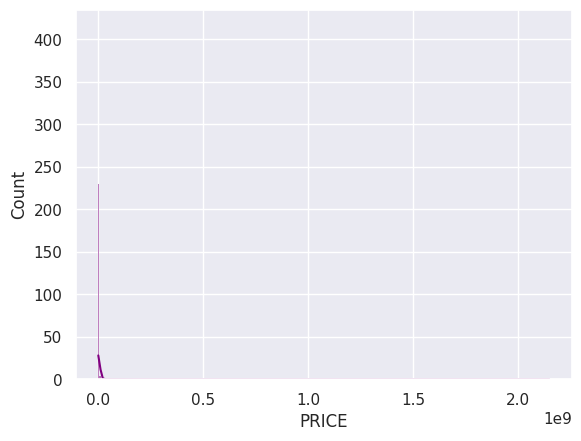

In [20]:
# Ver distribuição dos preços
sns.set(style="darkgrid")
sns.histplot(data=df, x=df['PRICE'], color='Purple', kde=True)
plt.show()

In [21]:
# A escala está claramente errada, isso se dá pela existência de valores extremos no eixo X
# Vamos olhar as casas custando mais de $100M (0.1*10⁹)
df[df['PRICE'] > 10**8]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,LATITUDE,LONGITUDE
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,New York,40.766393,-73.980991
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0,10000.0,New York,40.518484,-74.224418


Casa de 2 bilhões e apto. por 195 Milhões... com uma rápida pesquisa verifica-se que são muito mais caras que mansões à venda em NY...


Tais pontos fora da curva são chamados **Outliers** e podem (_devem_) ser removidos do conjunto

In [22]:
df = df.drop(df[df['PRICE'] > 10**7].index)

In [23]:
# Ver como ficou após remoção de valores extremos
df['PRICE'].describe()

count    3.733000e+03
mean     1.302051e+06
std      1.459286e+06
min      5.800000e+03
25%      5.000000e+05
50%      8.250000e+05
75%      1.400000e+06
max      1.000000e+07
Name: PRICE, dtype: float64

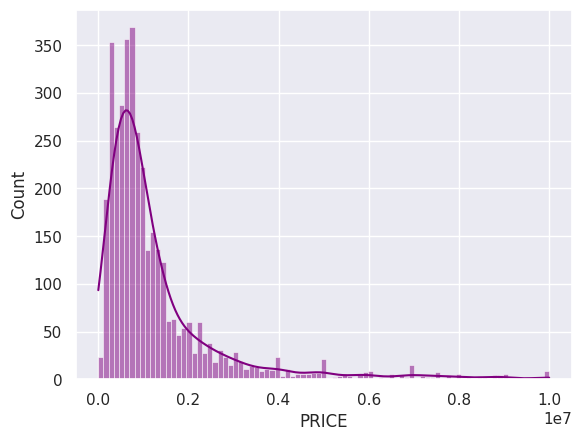

In [24]:
sns.histplot(data=df, x=df['PRICE'], color='Purple', kde=True)
plt.show()

<Axes: title={'center': 'PRICE'}, ylabel='Frequency'>

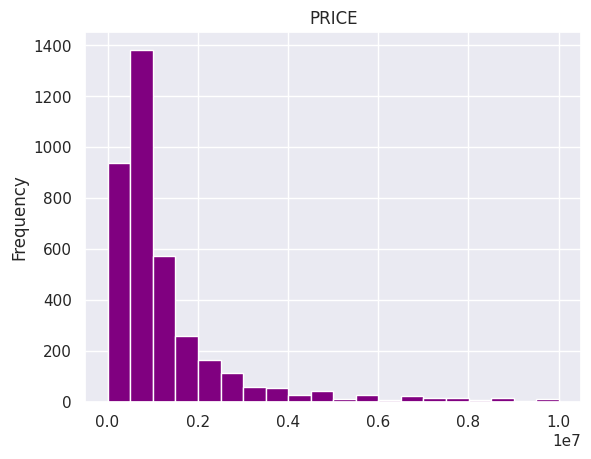

In [25]:
# Outra versão, usando matplotlib
df['PRICE'].plot(kind='hist', color='Purple', bins=20, title='PRICE')

#### Beds

In [26]:
df['BEDS'].describe()

count    3733.000000
mean        3.394321
std         2.580617
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        40.000000
Name: BEDS, dtype: float64

<Axes: xlabel='BEDS', ylabel='Count'>

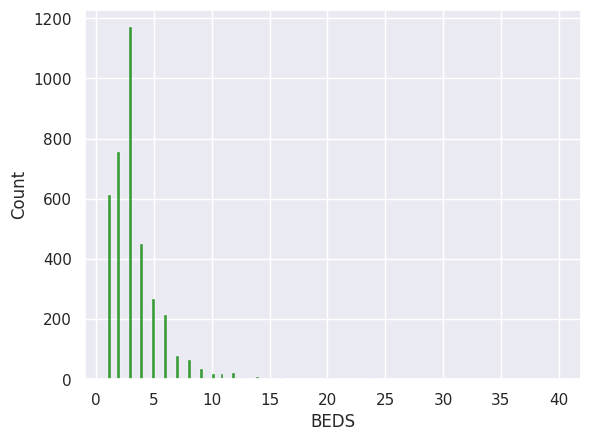

In [27]:
sns.histplot(data=df['BEDS'], color="Green")

In [28]:
# Vamos procurar por outliers
camas = df[df['BEDS'] > 12] # escolher ponto de corte
camas.shape

(34, 9)

<Axes: xlabel='BEDS', ylabel='Count'>

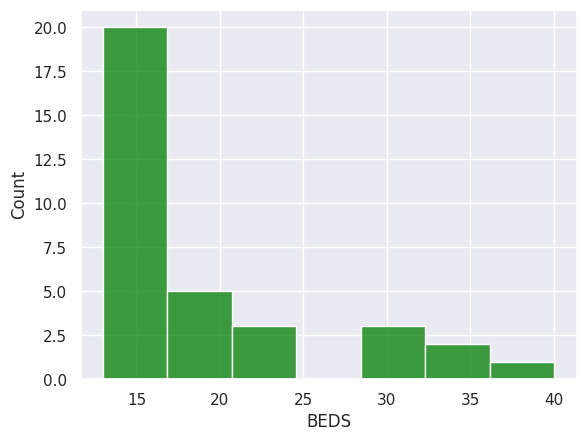

In [29]:
# Olhando a distribuição de casas com muitas camas
sns.histplot(data=camas['BEDS'], color="Green")

In [30]:
camas['TYPE'].unique()

array(['Multi-family home for sale', 'House for sale',
       'Townhouse for sale'], dtype=object)

Aparentemente nenhum valor grande foi inserido por acaso, o alto número de camas em algumas residências é justificado considerando o tipo de imóvel, cabendo a nós escolher se mantemos essas entradas ou não, ao depender da análise sendo feita. Para esse exemplo vamos apenas removê-las:

In [31]:
df = df[df['BEDS'] <= 12]

#### Bath

In [32]:
df['BATH'].describe()

count    3699.000000
mean        2.257331
std         1.433564
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: BATH, dtype: float64

<Axes: xlabel='BATH', ylabel='Count'>

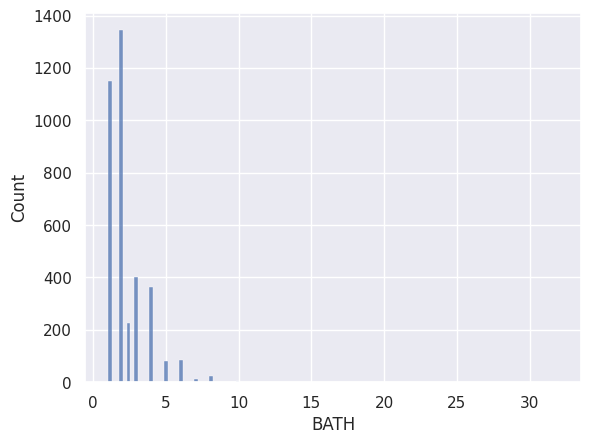

In [33]:
sns.histplot(data=df['BATH'])

In [34]:
df = df[df['BATH'] <= 6]

<Axes: xlabel='BATH', ylabel='Count'>

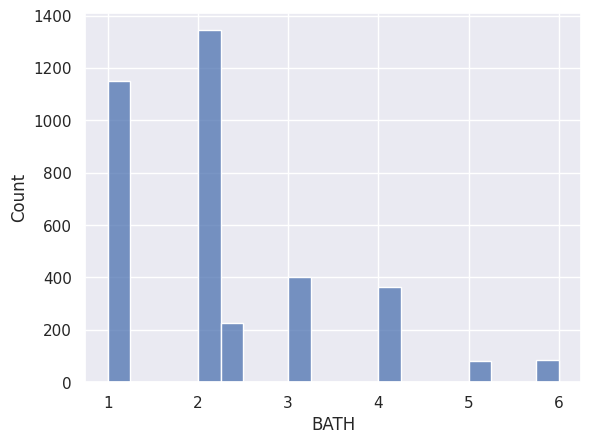

In [35]:
sns.histplot(data=df['BATH'])

Note que algumas casas marcam um número racional de banheiros (?), em verdade, lembre-se que os objetos da coluna referente ao número de banheiros eram dados Float (Q) ao invés de Int (Z), como há mais de 200 entradas com esse problema, vamos apenas arredondá-las

In [36]:
df['BATH'] = df['BATH'].astype('int')

<Axes: xlabel='BATH', ylabel='Count'>

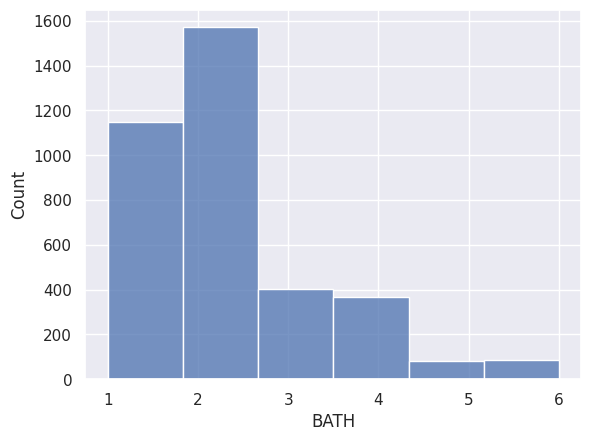

In [37]:
sns.histplot(data=df['BATH'], bins=6)

#### Property SQFT
#### 1 sqft = 0.092903 m², converter em m² para facilitar a compreensão no sistema métrico

In [38]:
df['PROPERTYSQFT'] = df['PROPERTYSQFT'].multiply(0.092903).round()
df.rename(columns={'PROPERTYSQFT': 'SQ_METERS'}, inplace=True)

In [39]:
df['SQ_METERS'].describe()

count    3655.000000
mean      184.579207
std       156.841963
min        23.000000
25%       111.000000
50%       203.000000
75%       203.000000
max      5138.000000
Name: SQ_METERS, dtype: float64

In [40]:
# Em consonânscia com o tratamento de outliers adotado até então, vamos estabelecer
# um ponto de corte para o qual restringiremos a análise
df = df[df['SQ_METERS'] <= 300]

<Axes: xlabel='SQ_METERS', ylabel='Count'>

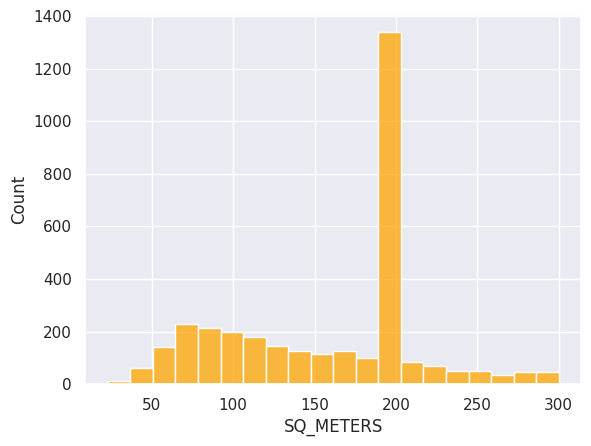

In [41]:
sns.histplot(data=df['SQ_METERS'], color="Orange", bins=20)

In [42]:
# Por que existem tantas casas com 203m²?
casa_203 = df[df['SQ_METERS'] == 203]
casa_203['TYPE'].describe()

count               1265
unique                 8
top       Co-op for sale
freq                 594
Name: TYPE, dtype: object

In [43]:
casa_203.describe()

,PRICE,BEDS,BATH,SQ_METERS,LATITUDE,LONGITUDE
count,1.265000e+03,1265.000000,1265.000000,1265.0,1265.000000,1265.000000
mean,1.099711e+06,3.097233,2.009486,203.0,40.729488,-73.902468
std,1.188168e+06,1.889143,1.166477,0.0,0.065481,0.081093
min,5.800000e+03,1.000000,1.000000,203.0,40.506902,-74.224704
25%,4.250000e+05,2.000000,1.000000,203.0,40.685774,-73.965567
50%,7.588880e+05,3.000000,2.000000,203.0,40.735883,-73.909824
75%,1.250000e+06,4.000000,2.000000,203.0,40.770191,-73.846380
max,9.000000e+06,12.000000,6.000000,203.0,40.908622,-73.702450


Uma olhada no Dataframe após o tratamento feito... a análise se torna simples quando temos os dados limpos e bem organizados:


In [44]:
df.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,SQ_METERS,LOCALITY,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,130.0,New York,40.761255,-73.974483
2,Brokered by Sowae Corp,House for sale,260000,4,2,187.0,New York,40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1,41.0,New York,40.761398,-73.974613
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2,203.0,New York County,40.809448,-73.946777
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1,70.0,The Bronx,40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1,91.0,Kings County,40.615738,-73.969694
10,Brokered by Engel & Volkers Americas,Co-op for sale,375000,2,1,79.0,Bronx County,40.824870,-73.922983
11,Brokered by Re/Max Edge,Townhouse for sale,689000,3,2,108.0,New York,40.624996,-74.155306
12,Brokered by COMPASS,Co-op for sale,259000,3,1,203.0,Queens County,40.753119,-73.881876
13,Brokered by Jamie & Connie Real Estate Grp,Co-op for sale,430000,2,2,203.0,Queens County,40.743864,-73.874572


## Tratando Locality - relabel

Agora que reduzimos o número de variáveis referentes a localização, vamos explorar a coluna "Locality" e ver se ela pode ser usada em alguma análise posterior com base na região em que o imóvel se encontra

In [45]:
df['LOCALITY'].unique()

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)

Como visto, as localizações se resumem a **11 regiões**, entretanto uma rápida pesquisa nos mostra que existem **apenas 5 regiões** (boroughs) principais em Nova York, são elas:

https://en.wikipedia.org/wiki/Boroughs_of_New_York_City

https://en.wikipedia.org/wiki/Flatbush

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/300px-5_Boroughs_Labels_New_York_City_Map.svg.png)

  1. Manhattan (New York County)
  2. Brooklyn (Kings County) ~_also_ Flatbush
  3. Queens (Queens County)
  4. The Bronx (Bronx County)
  5. Staten Island (Richmond County)

Dito isto, vamos escolher um rótulo e padronizar, como exemplo, "Brooklyn", "Kings County", "Flatbush" se referem à mesma região. Optei por nomeá-las apenas por "Brooklyn", o que facilita análises futuras.

In [46]:
# Troca-se a coluna 'LOCALITY' por ela mesma, mas com cada item da primeira lista assumindo o nome na segunda, em sua respectiva posição
# aqui, 'New York County' vira 'Manhattan', 'Kings County' passará a ser chamado "Brooklyn", etc
df['LOCALITY'] = df['LOCALITY'].replace(['New York County','Kings County','Queens County','Bronx County','Richmond County','Flatbush'],
                                        ['Manhattan','Brooklyn','Queens','The Bronx','Staten Island','Brooklyn'])

In [47]:
# confirma
df['LOCALITY'].head(10)

0      New York
2      New York
3      New York
6     Manhattan
8     The Bronx
9      Brooklyn
10    The Bronx
11     New York
12       Queens
13       Queens
Name: LOCALITY, dtype: object

In [48]:
df['LOCALITY'].unique()

array(['New York', 'Manhattan', 'The Bronx', 'Brooklyn', 'Queens',
       'Staten Island', 'United States'], dtype=object)

Note que a maior parte foi corrigida, mas ainda há pontos a serem vistos:

-- "United States". Fala por si só, descarta-se ou usamos as outras colunas para descobrir a região

-- "New York".  É o Estado de NY? Cidade de NY? Borought NY County (a.k.a Manhattan)?

**1ª opção:** Analisar a qual proporção do banco de dados diz respeito a estas classificações, se for pequena, considerar excluir as entradas

In [49]:
# Lembre-se que
df.shape

(3373, 9)

Uma vez que 2382 é mais do que a metade dos dados disponíveis, não podemos meramente descartá-los, visto que teria grande impacto nas análises feitas, não representando a realidade.

### Vamos examinar a geodistribuição dos imóveis usando a biblioteca GeoPandas:

In [50]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [51]:
street_map = gpd.read_file('/kaggle/input/all-ny-shoreline/Counties_Shoreline.shp')

<Axes: >

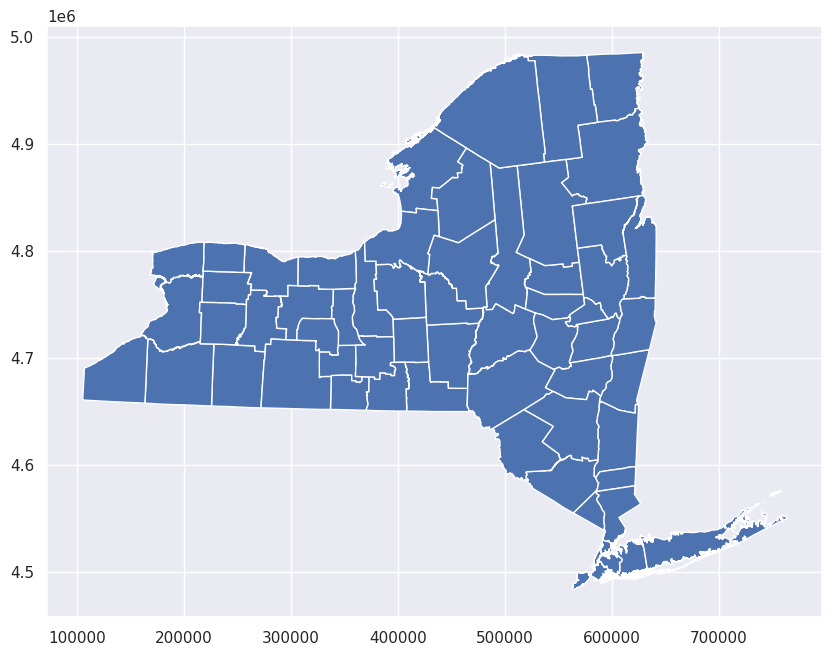

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax)

In [53]:
crs = {'init':'epsg:4674'} # sistema de coordenada de referência

In [54]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

geo_df = gpd.GeoDataFrame(df, 
                          crs=crs, 
                          geometry=geometry)

In [55]:
geo_df = geo_df.to_crs(street_map.crs)

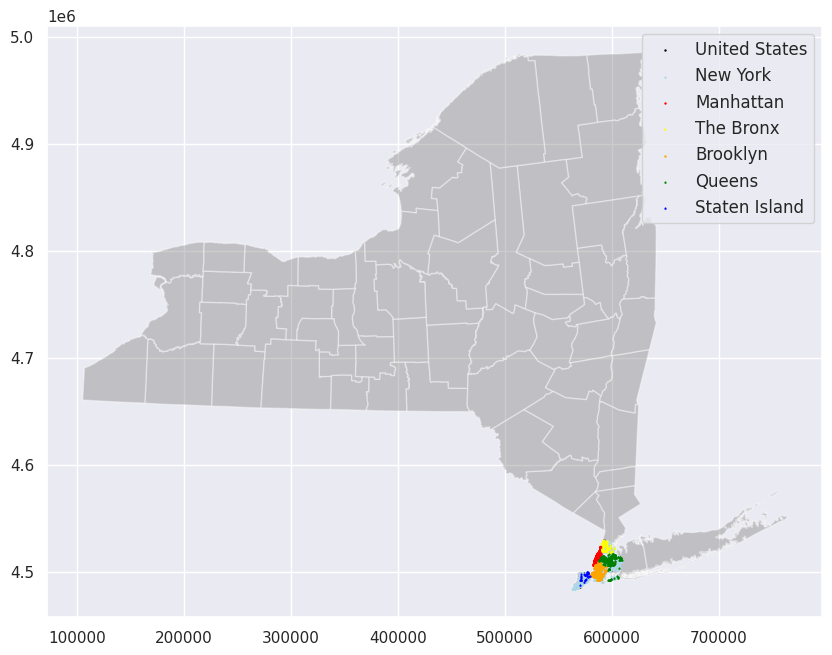

In [56]:
fig, ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['LOCALITY'] == 'United States'].plot(ax=ax,
                                       markersize=0.5,
                                       color='black',
                                       marker='o',
                                       label='United States')
geo_df[geo_df['LOCALITY'] == 'New York'].plot(ax=ax,
                                       markersize=0.5,
                                       color='lightblue',
                                       marker='^',
                                       label='New York')
geo_df[geo_df['LOCALITY'] == 'Manhattan'].plot(ax=ax,
                                       markersize=0.5,
                                       color='red',
                                       marker='o',
                                       label='Manhattan')
geo_df[geo_df['LOCALITY'] == 'The Bronx'].plot(ax=ax,
                                       markersize=0.5,
                                       color='yellow',
                                       marker='^',
                                       label='The Bronx')
geo_df[geo_df['LOCALITY'] == 'Brooklyn'].plot(ax=ax,
                                       markersize=0.5,
                                       color='orange',
                                       marker='o',
                                       label='Brooklyn')
geo_df[geo_df['LOCALITY'] == 'Queens'].plot(ax=ax,
                                       markersize=0.5,
                                       color='green',
                                       marker='^',
                                       label='Queens')
geo_df[geo_df['LOCALITY'] == 'Staten Island'].plot(ax=ax,
                                       markersize=0.5,
                                       color='blue',
                                       marker='^',
                                       label='Staten Island')
plt.legend(prop={'size':12})

In [57]:
street_map2 = gpd.read_file('/kaggle/input/nyc-ver1/nyzd.shp')

<Axes: >

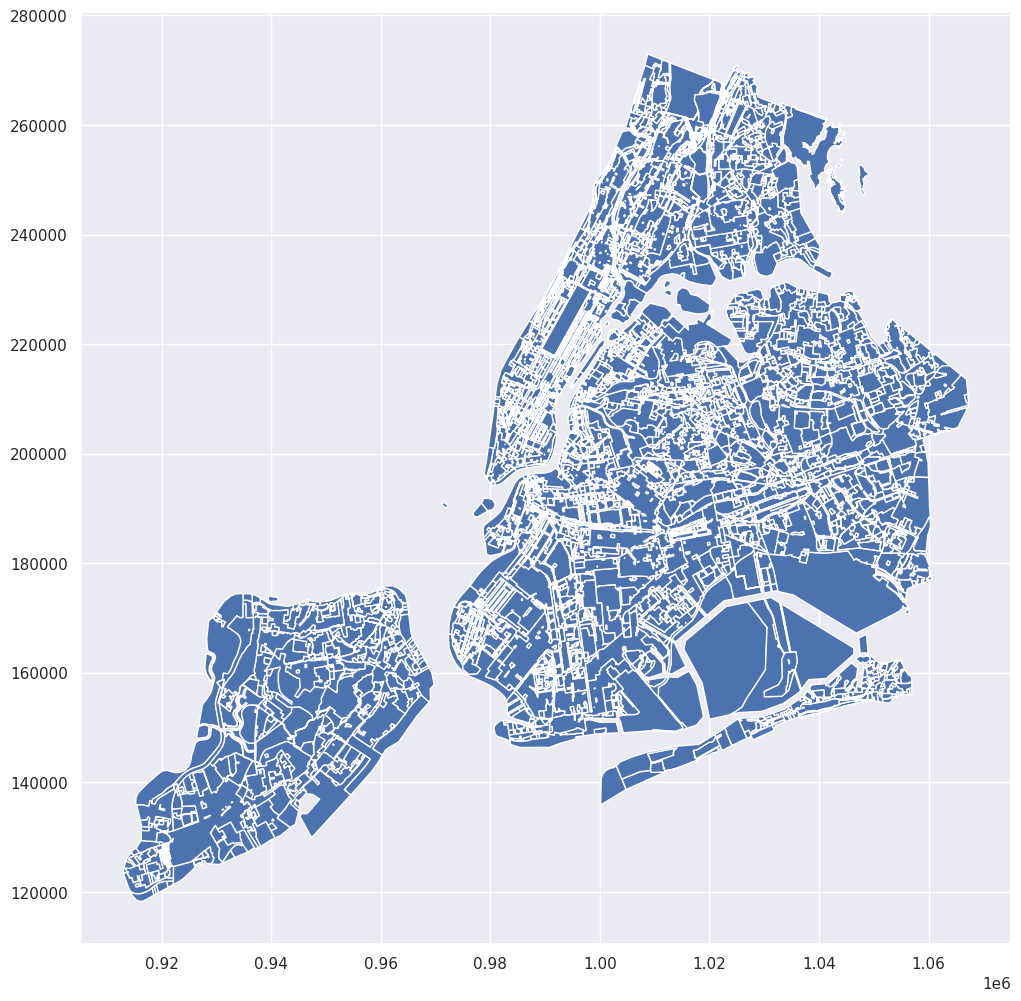

In [58]:
fig, ax = plt.subplots(figsize=(12,16))
street_map2.plot(ax=ax)

In [59]:
geometry2 = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

geo_df2 = gpd.GeoDataFrame(df, crs=crs, geometry=geometry2)
geo_df2 = geo_df2.to_crs(street_map2.crs)

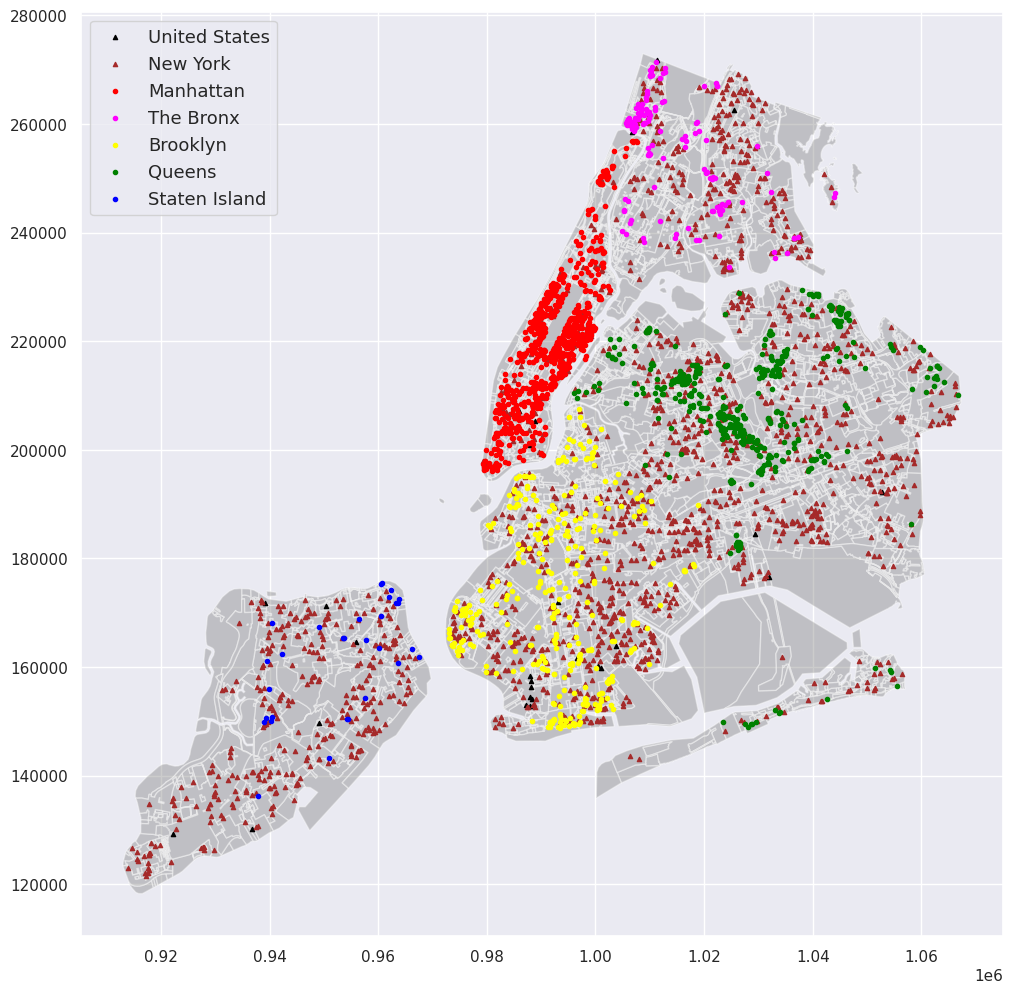

In [60]:
fig, ax = plt.subplots(figsize=(12,12)) 
street_map2.plot(ax=ax, alpha=0.4, color='grey')
geo_df2[geo_df2['LOCALITY'] == 'United States'].plot(ax=ax,
                                       markersize=9,
                                       color='black',
                                       marker='^',
                                       label='United States')
geo_df2[geo_df2['LOCALITY'] == 'New York'].plot(ax=ax,
                                       markersize=9,
                                       color='brown',
                                       marker='^',
                                       label='New York')
geo_df2[geo_df2['LOCALITY'] == 'Manhattan'].plot(ax=ax,
                                       markersize=9,
                                       color='red',
                                       marker='o',
                                       label='Manhattan')
geo_df2[geo_df2['LOCALITY'] == 'The Bronx'].plot(ax=ax,
                                       markersize=9,
                                       color='magenta',
                                       marker='o',
                                       label='The Bronx')
geo_df2[geo_df2['LOCALITY'] == 'Brooklyn'].plot(ax=ax,
                                       markersize=9,
                                       color='yellow',
                                       marker='o',
                                       label='Brooklyn')
geo_df2[geo_df2['LOCALITY'] == 'Queens'].plot(ax=ax,
                                       markersize=9,
                                       color='green',
                                       marker='o',
                                       label='Queens')
geo_df2[geo_df2['LOCALITY'] == 'Staten Island'].plot(ax=ax,
                                       markersize=9,
                                       color='blue',
                                       marker='o',
                                       label='Staten Island')
plt.legend(prop={'size':13})

**2ª opção:** Usar as coordenadas dos imóveis com região bem definida para deduzir a localização mais provável daqueles que são ambíguos, o que pode ser feito usando um modelo de classificação. Por simplicidade didática vamos apresentar e usar o modelo KNN (K-Nearest Neighbours).

# Tratando Locality - KNN

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1400%2F1*jyZpd_nenl5vPfCEgZtEiw.png&f=1&nofb=1&ipt=f8f9a3000476366afc16ace2961f59d5be123b4e0c15b343dab07c65971c08ce&ipo=images)

In [61]:
# Vamos separar os dados entre as entradas corretas, que serão usadas no treino,
# já para as incorretas vamos realizar a predição
boroughts = ['Manhattan', 'The Bronx', 'Brooklyn', 'Queens', 'Staten Island']

df_known = df.loc[df['LOCALITY'].isin(boroughts)] # Separa os conhecidos
df_unknown = df[(df['LOCALITY'] == 'New York') | (df['LOCALITY'] == 'United States')] # Separa os que queremos arrumar

In [62]:
X = df_known[['LATITUDE', 'LONGITUDE']] # Variável preditora
y = df_known['LOCALITY'] # Variável resposta
# Cuidado com Maiúsculo/minúsculo !!!

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separando 80% dos dados para serem usados como treino, o resto serve
# para validar e quantificar a taxa de acertos do modelo treinado

In [64]:
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors = 10) # Esconlhe-se um N
modelo.fit(X_train,y_train) # efetua-se o treinamento

KNeighborsClassifier(n_neighbors=10)

In [65]:
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(X_test) # Modelo treinado avalia conjunto de teste
accuracy = accuracy_score(y_test, y_pred) # Calcula a % de acerto
print("Acurácia:", accuracy)

Acurácia: 0.9817629179331308


#### Cross Validation
É possível que a distribuição dos dados influencie no modo em que o modelo foi treinado. Para ter uma ideia melhor da acurácia real, podemos realizar uma **validação cruzada**, que consiste em treinar o modelo várias vezes, variando qual parte dos dados o algoritmo usa para aprender e qual parte ele tenta prever. No final calcula-se a média das acurácias obtidas em cada teste.

![](https://i0.wp.com/vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-15-at-11.13.53-AM.png?fit=687%2C371&ssl=1)

In [66]:
from sklearn.model_selection import cross_val_score

modelo_cv = KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(modelo_cv, X, y, cv=5) # cv=5, realizamos 5 treinamentos
print(cv_scores) # acurácia de cada treino
print('cv_scores mean: {}'.format(np.mean(cv_scores))) # média final dos scores

[0.98176292 0.99390244 0.98780488 0.99695122 0.97865854]
cv_scores mean: 0.9878159982207725


Este é um valor muito alto de acurácia, possíveis explicações incluem:

* O problema era demasiadamente fácil e o algoritmo apenas performou bem
* Houve vazamento de dados, de modo que o modelo treinado acessou parte dos dados de teste
* A escolha de parâmetros ou o tamanho pequeno da amostra geraram um Overfit

Para reduzir a dúvida, podemos usar outro modelo ou trocar de métrica

In [67]:
# Algumas outras métricas...
from sklearn.metrics import f1_score, precision_score, recall_score

print(f'F1_Score: {f1_score(y_test, y_pred, average="weighted")}')
print(f'Precisão: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')

F1_Score: 0.9819353213179158
Precisão: 0.9827788635630333
Recall: 0.9817629179331308


O modelo performou muito bem sob a perspectiva de várias métricas, o que nos dá uma margem maior de segurança para crer que o alto desempenho se deu pela "simplicidade" do problema para o algoritmo e não por algum viés introduzido na preparação dos dados

Dito isso, vamos realizar a predição "_de facto_" nos pontos marcados como "New York" e "United States", que estavam guardados em df_unknown:

In [68]:
X_unknown = df_unknown[['LATITUDE', 'LONGITUDE']] # variáveis preditoras
predicted_localities = modelo.predict(X_unknown) # guardamos o palpite do algoritmo em um vetor

In [69]:
# Substituindo os "New York" e "United States" no DataFrame pela localização prevista pelo algoritmo
df.loc[df_unknown.index, 'LOCALITY'] = predicted_localities

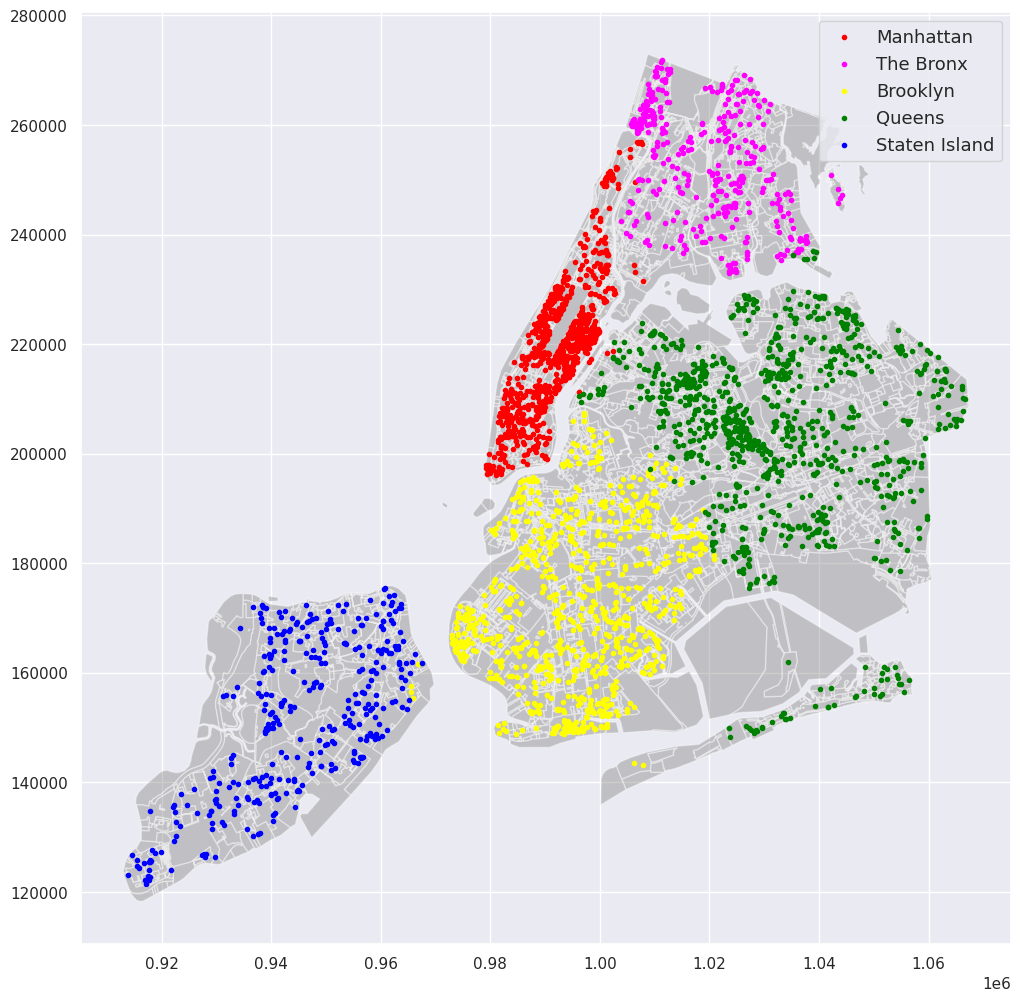

In [70]:
# Atualiza
geo_df2 = gpd.GeoDataFrame(df, crs=crs, geometry=geometry2)
geo_df2 = geo_df2.to_crs(street_map2.crs)

fig, ax = plt.subplots(figsize=(12,16)) #12 16
street_map2.plot(ax=ax, alpha=0.4, color='grey')
#geo_df2[geo_df2['LOCALITY'] == 'United States'].plot(ax=ax,
#                                       markersize=9,
#                                       color='black',
#                                       marker='^',
#                                       label='United States')
#geo_df2[geo_df2['LOCALITY'] == 'New York'].plot(ax=ax,
#                                       markersize=9,
#                                       color='brown',
#                                       marker='^',
#                                       label='New York')
geo_df2[geo_df2['LOCALITY'] == 'Manhattan'].plot(ax=ax,
                                       markersize=9,
                                       color='red',
                                       marker='o',
                                       label='Manhattan')
geo_df2[geo_df2['LOCALITY'] == 'The Bronx'].plot(ax=ax,
                                       markersize=9,
                                       color='magenta',
                                       marker='o',
                                       label='The Bronx')
geo_df2[geo_df2['LOCALITY'] == 'Brooklyn'].plot(ax=ax,
                                       markersize=9,
                                       color='yellow',
                                       marker='o',
                                       label='Brooklyn')
geo_df2[geo_df2['LOCALITY'] == 'Queens'].plot(ax=ax,
                                       markersize=9,
                                       color='green',
                                       marker='o',
                                       label='Queens')
geo_df2[geo_df2['LOCALITY'] == 'Staten Island'].plot(ax=ax,
                                       markersize=9,
                                       color='blue',
                                       marker='o',
                                       label='Staten Island')
plt.legend(prop={'size':13})

O algoritmo fez um bom trabalho prevendo a localização, de modo que o tratamento da coluna 'LOCALITY' está completo. Entretanto, caso a métrica de avaliação não fosse favorável para o algoritmo KNN, poderíamos ter executado o seguinte código (GridSearch), que treinaria o modelo várias vezes trocando o parâmetro número de vizinhos, de modo a maximizar a acurácia (note que isto pode levar um tempo para rodar):

      from sklearn.model_selection import GridSearchCV
      
      modelo = KNeighborsClassifier()                 # Seleciona modelo KNN
      num_viz = {'n_neighbors': np.arange(1, 25)}     # Treinar com N = 1 ~ 25 vizinhos
      knn_gscv = GridSearchCV(modelo, num_viz, cv=5)  # Cross-validation
      resultado = knn_gscv.fit(X, y)                  # Guarda previsão feita com melhor N
                            
      print(f"O melhor score obtido foi {knn_gscv.best_score_} usando {knn_gscv.best_params_}")

#### One Hot Encoding
Para incluir variáveis categóricas na análise juntamente com variáveis numéricas, é interessante aplicar a técnica de One Hot Encoding

https://www.geeksforgeeks.org/ml-one-hot-encoding/

In [71]:
df_ohe = pd.get_dummies(df['LOCALITY'], prefix='bairros', drop_first=False)

categorias_numericas = ['1', '2', '3', '4', '5']
df_ohe.columns = ['bairros_' + cat for cat in categorias_numericas]
df2 = pd.concat([df, df_ohe], axis=1)

In [72]:
df['LOCALITY'].unique()

array(['Manhattan', 'Staten Island', 'The Bronx', 'Brooklyn', 'Queens'],
      dtype=object)

In [73]:
df_ohe2 = pd.get_dummies(df['TYPE'], prefix='type', drop_first=False)

categorias_numericas2 = ['1', '2', '3', '4', '5', '6', '7', '8']
df_ohe2.columns = ['type_' + cat for cat in categorias_numericas2]
df2 = pd.concat([df2, df_ohe2], axis=1)

In [74]:
df2 = df2.reset_index(drop=True) # Finalizamos refazendo o índice e guardando o DataFrame tratado em um novo objeto
df2.head(10)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,SQ_METERS,LOCALITY,LATITUDE,LONGITUDE,bairros_1,...,bairros_4,bairros_5,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,130.0,Manhattan,40.761255,-73.974483,False,...,False,False,False,True,False,False,False,False,False,False
1,Brokered by Sowae Corp,House for sale,260000,4,2,187.0,Staten Island,40.541805,-74.196109,False,...,True,False,False,False,False,True,False,False,False,False
2,Brokered by COMPASS,Condo for sale,69000,3,1,41.0,Manhattan,40.761398,-73.974613,False,...,False,False,False,True,False,False,False,False,False,False
3,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2,203.0,Manhattan,40.809448,-73.946777,False,...,False,False,False,True,False,False,False,False,False,False
4,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1,70.0,The Bronx,40.821586,-73.874089,False,...,False,True,True,False,False,False,False,False,False,False
5,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1,91.0,Brooklyn,40.615738,-73.969694,True,...,False,False,True,False,False,False,False,False,False,False
6,Brokered by Engel & Volkers Americas,Co-op for sale,375000,2,1,79.0,The Bronx,40.824870,-73.922983,False,...,False,True,True,False,False,False,False,False,False,False
7,Brokered by Re/Max Edge,Townhouse for sale,689000,3,2,108.0,Staten Island,40.624996,-74.155306,False,...,True,False,False,False,False,False,False,False,False,True
8,Brokered by COMPASS,Co-op for sale,259000,3,1,203.0,Queens,40.753119,-73.881876,False,...,False,False,True,False,False,False,False,False,False,False
9,Brokered by Jamie & Connie Real Estate Grp,Co-op for sale,430000,2,2,203.0,Queens,40.743864,-73.874572,False,...,False,False,True,False,False,False,False,False,False,False


# Análise Gráfica das features

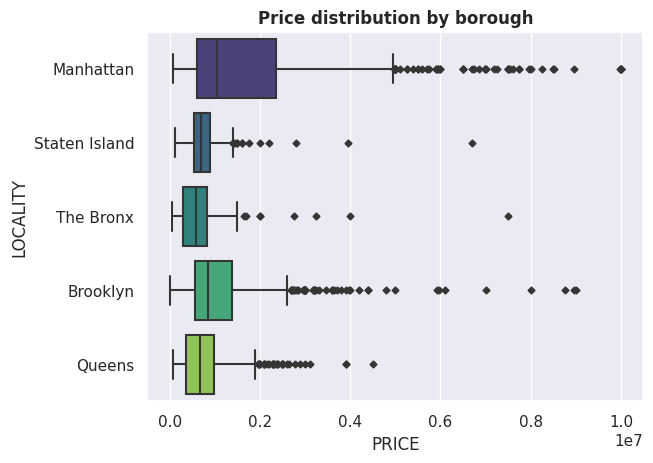

In [75]:
sns.boxplot(data=df2, x=df2['PRICE'], y=df2['LOCALITY'], palette='viridis',
            flierprops={'marker': 'D', 'markersize': 3.5})
plt.title('Price distribution by borough', fontweight='bold')
plt.show()

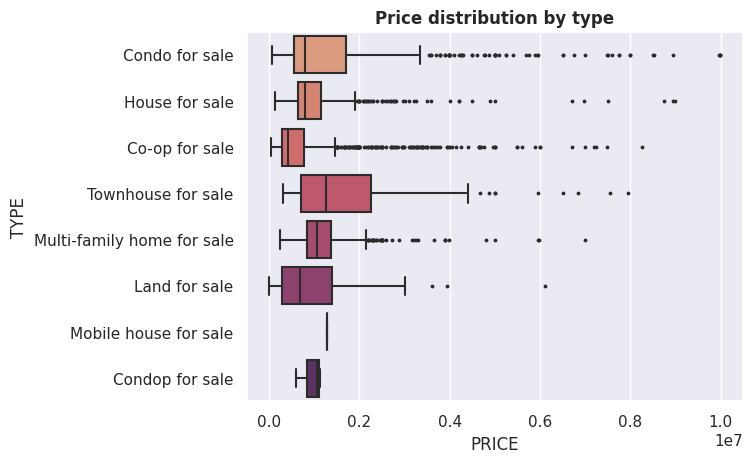

In [76]:
sns.boxplot(data=df2, x=df2['PRICE'], y=df2['TYPE'], palette='flare',
            flierprops={'marker': '.', 'markersize': 3.5})
plt.title('Price distribution by type', fontweight='bold')
plt.show()

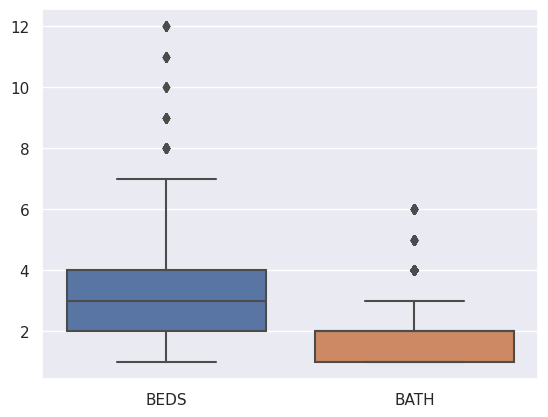

In [77]:
sns.boxplot(data=df2.loc[:, ['BEDS', 'BATH']])
plt.show()

In [78]:
df2['TYPE'].unique()

array(['Condo for sale', 'House for sale', 'Co-op for sale',
       'Townhouse for sale', 'Multi-family home for sale',
       'Land for sale', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

In [79]:
colunas = ['PRICE', 'SQ_METERS', 'BEDS', 'BATH', 'bairros_1', 'bairros_2', 'bairros_3',
       'bairros_4', 'bairros_5', 'type_1', 'type_2', 'type_3', 'type_4',
       'type_5', 'type_6', 'type_7', 'type_8']
corr_matrix = df2[colunas].corr()

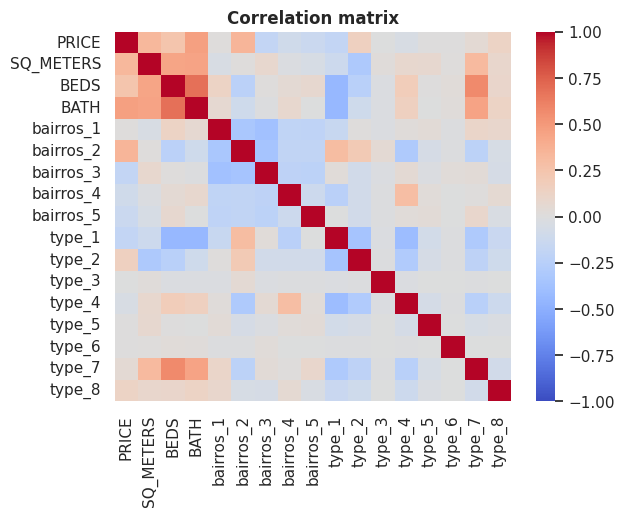

In [80]:
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation matrix', fontweight='bold')
plt.show()

Veja que o Preço possui correlação alta com a metragem e o número de camas/ banheiros

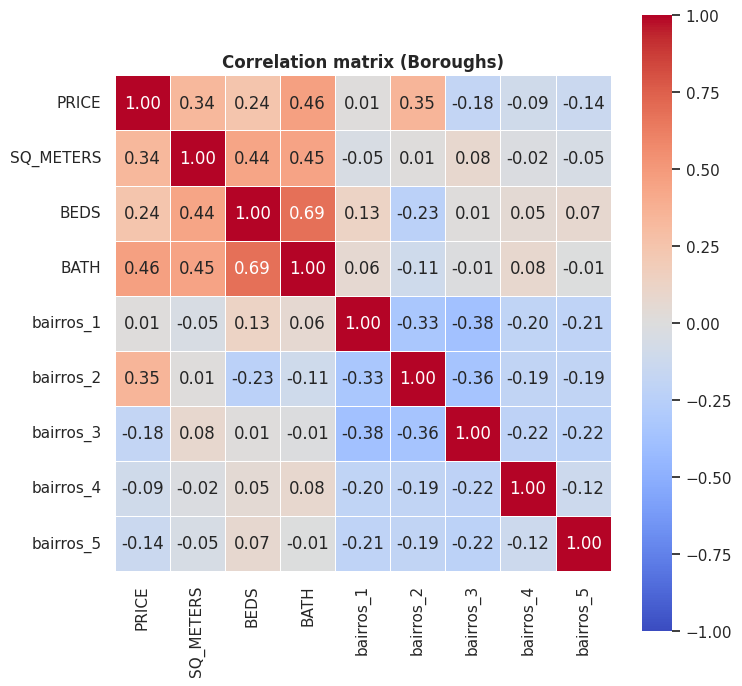

In [81]:
# Selecionando algumas colunas para olhar mais de perto
colunas = ['PRICE', 'SQ_METERS', 'BEDS', 'BATH', 'bairros_1', 'bairros_2',
           'bairros_3','bairros_4', 'bairros_5']
corr_matrix = df2[colunas].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square= True,
            linewidth=.5, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation matrix (Boroughs)', fontweight='bold')
plt.show()

Note a correlação entre Preço e 'bairros_2', isto é, Staten Island

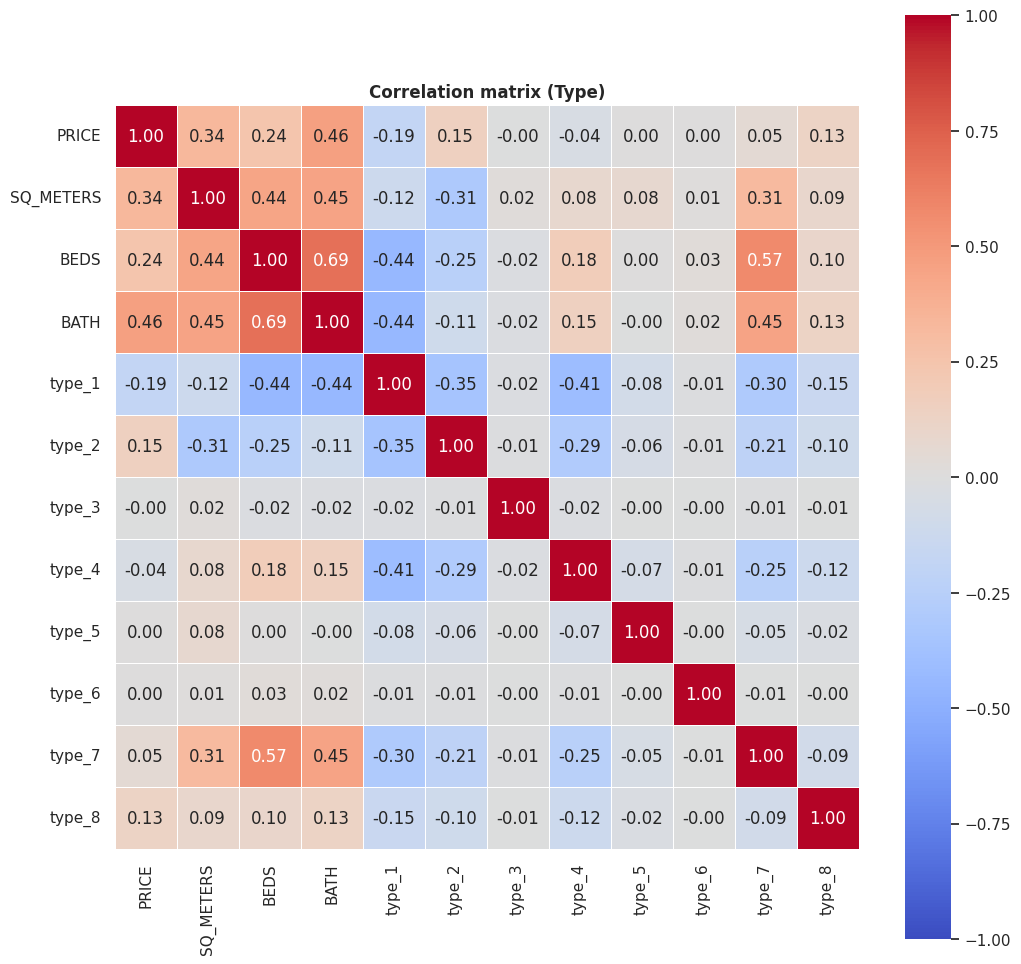

In [82]:
colunas = ['PRICE', 'SQ_METERS', 'BEDS', 'BATH', 'type_1', 'type_2', 'type_3', 'type_4',
       'type_5', 'type_6', 'type_7', 'type_8']
corr_matrix = df2[colunas].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', square= True,
            linewidth=.5, cmap='coolwarm',vmin=-1, vmax=1)
plt.title('Correlation matrix (Type)', fontweight='bold')
plt.show()

'type_7' ('Mobile house for sale'), impacta bastante na metragem, num de camas/baheiros, etc. O que é de se esperar considerando este tipo de casa.

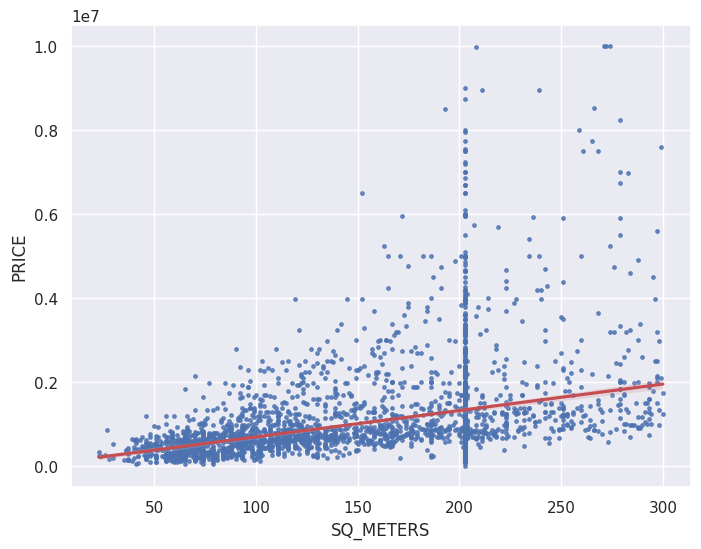

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=df['SQ_METERS'],
    y=df['PRICE'],
    line_kws={"color": "r"},
    scatter_kws={'s': 6},
    ax=ax
)
plt.show()

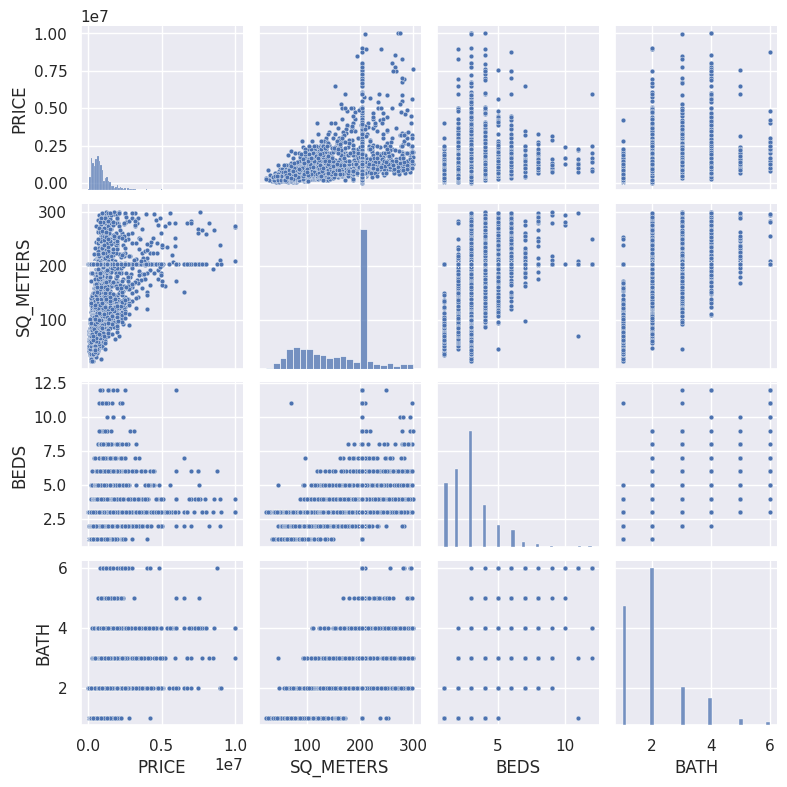

In [84]:
# Comparando tudo com tudo 2 a 2, por vezes é útil
sns.pairplot(df2, vars=['PRICE', 'SQ_METERS', 'BEDS', 'BATH'], height=2, plot_kws={'s': 12})
plt.show()

##### Um gráfico mais elaborado usando a biblioteca Pywaffle:

In [85]:
# Não faz parte das bibliotecas mais usadas, vamos baixá-la manualmente
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 42.6 MB/s eta 0:00:00


In [86]:
from pywaffle import Waffle

In [87]:
total_tipos = []
tipos = df2['TYPE'].unique().tolist()

for tipo in tipos:
  df_tipo = df2[df2['TYPE'] == tipo]
  total_tipos.append(df_tipo['LOCALITY'].value_counts().tolist())

# Adiciona 0's para igualar o tamanho das listas
max_len = max(len(lst) for lst in total_tipos)
total_tipos = [lst + [0] * (max_len - len(lst)) for lst in total_tipos]

In [88]:
data = {'labels': ['Manhattan', 'Staten Island', 'The Bronx', 'Brooklyn', 'Queens'],
        'Condo for sale': total_tipos[0],
        'House for sale': total_tipos[1],
        'Co-op for sale': total_tipos[2],
        'Townhouse for sale': total_tipos[3],
        'Multi-family home for sale': total_tipos[4],
        'Land for sale': total_tipos[5],
        'Mobile house for sale': total_tipos[6],
        'Condop for sale': total_tipos[7],
       }
df_waffle = pd.DataFrame(data).set_index('labels').transpose()

In [89]:
df_waffle

labels,Manhattan,Staten Island,The Bronx,Brooklyn,Queens
Condo for sale,283,183,142,34,34
House for sale,283,233,220,105,17
Co-op for sale,474,346,186,117,3
Townhouse for sale,63,27,23,20,7
Multi-family home for sale,193,172,90,58,9
Land for sale,18,10,9,8,2
Mobile house for sale,1,0,0,0,0
Condop for sale,3,0,0,0,0


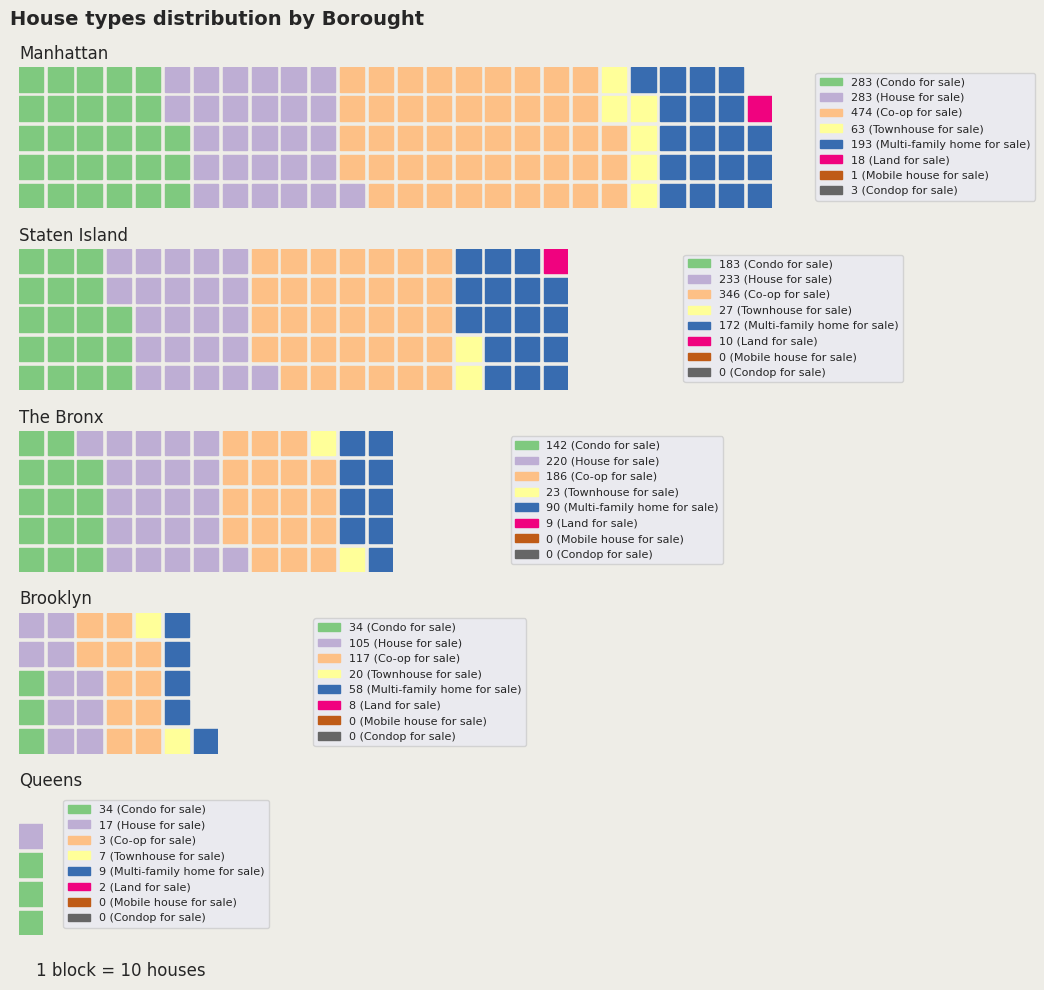

In [90]:
plot1 = {'values': [value/10 for value in df_waffle['Manhattan']],
         'labels': [f"{index} ({value})" for index, value in zip(df_waffle['Manhattan'],df_waffle.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
         'title': {'label': 'Manhattan', 'loc': 'left', 'fontsize': 12}
        }

plot2 = {'values': [value/10 for value in df_waffle['Staten Island']],
         'labels': [f"{index} ({value})" for index, value in zip(df_waffle['Staten Island'],df_waffle.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
         'title': {'label': 'Staten Island', 'loc': 'left', 'fontsize': 12}
        }

plot3 = {'values': [value/10 for value in df_waffle['The Bronx']],
         'labels': [f"{index} ({value})" for index, value in zip(df_waffle['The Bronx'],df_waffle.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
         'title': {'label': 'The Bronx', 'loc': 'left', 'fontsize': 12}
        }

plot4 = {'values': [value/10 for value in df_waffle['Brooklyn']],
         'labels': [f"{index} ({value})" for index, value in zip(df_waffle['Brooklyn'],df_waffle.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.45, 1), 'fontsize': 8},
         'title': {'label': 'Brooklyn', 'loc': 'left', 'fontsize': 12}
        }

plot5 = {'values': [value/10 for value in df_waffle['Queens']],
         'labels': [f"{index} ({value})" for index, value in zip(df_waffle['Queens'],df_waffle.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.6, 1), 'fontsize': 8},
         'title': {'label': 'Queens', 'loc': 'left', 'fontsize': 12}
        }


fig = plt.figure(
    FigureClass=Waffle,
    plots={
        511: plot1,
        512: plot2,
        513: plot3,
        514: plot4,
        515: plot5
    },
    rows=5,
    cmap_name="Accent",
    rounding_rule='floor',  # arredondando para baixo
    figsize=(12, 10)
)


fig.suptitle('House types distribution by Borought', fontsize=14, fontweight='bold', x=0.18)
fig.supxlabel('1 block = 10 houses',
              fontsize=12,
              x=0.1,
             )
fig.set_facecolor('#EEEDE7')

plt.show()

In [91]:
# Gráfico 3D interativo com Plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=df2['LONGITUDE'],
    y=df2['LATITUDE'],
    z=df2['PRICE'],
    mode='markers',
    marker=dict(
        size=2,
        color=df2['PRICE'],
        colorscale='Plasma',
        opacity=1
    )
)])

fig.update_layout(title='Gráfico de Dispersão 3D das coordenadas e do preço',
                  scene=dict(xaxis_title='Longitude', yaxis_title='Latitude', zaxis_title='Preço'),
                  width=800, height=600)
fig.show()


# Precificando imóveis com Regressão Linear

Por fim, vamos aplicar uma regressão linear. Queremos treinar o modelo de regressão de tal forma a obter um valor numérico (preço estimado do imóvel) ao fornecer alguns valores das colunas (ex: Local, metragem, nº quartos/ banheiros)

In [92]:
# Separar treino/ teste
dados = df2
df_train, df_test = train_test_split(dados, test_size=0.20, random_state=42)

Vamos separar a variável resposta Y (a que queremos prever) e as variáveis preditoras X (as quais o modelo usará em seu treinamento)

In [93]:
# Conjunto teste
X_test = df_train.loc[:,dados.columns != 'PRICE']
y_test = df_test['PRICE']

# Conjunto treino
X_train = df_train.loc[:,dados.columns != 'PRICE']
y_train = df_train['PRICE']

Apesar de ser possível utilizar todas as features disponíveis como variáveis preditoras, essa decisão não necessariamente torna o modelo melhor, visto que costuma introduzir ruído. Uma alternativa é plotar o gráfico das correlações (como feito acima) e escolher apenas as features que mais impactam a variável resposta (3~5 me parece um bom número)

In [94]:
colunas = ['BATH','SQ_METERS','BEDS']
X_train_selected = X_train[colunas]

In [95]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() # Escolhemos o modelo

# Avalia o desempenho, quanto menor melhor
scores = cross_val_score(reg, X_train_selected, y_train, cv=10, scoring='neg_mean_squared_error')
scores_medio = -scores.mean()
scores_medio

979035323095.4412

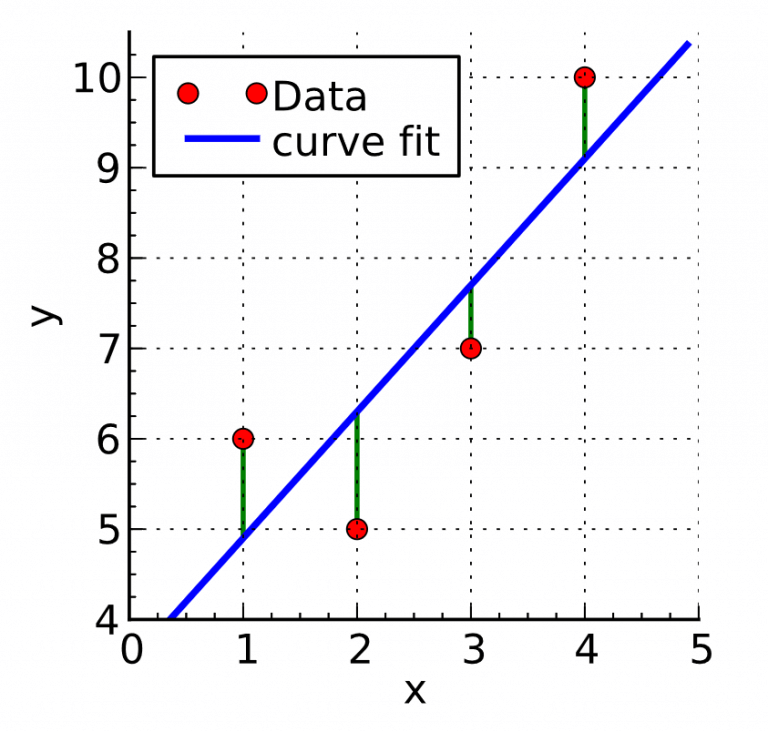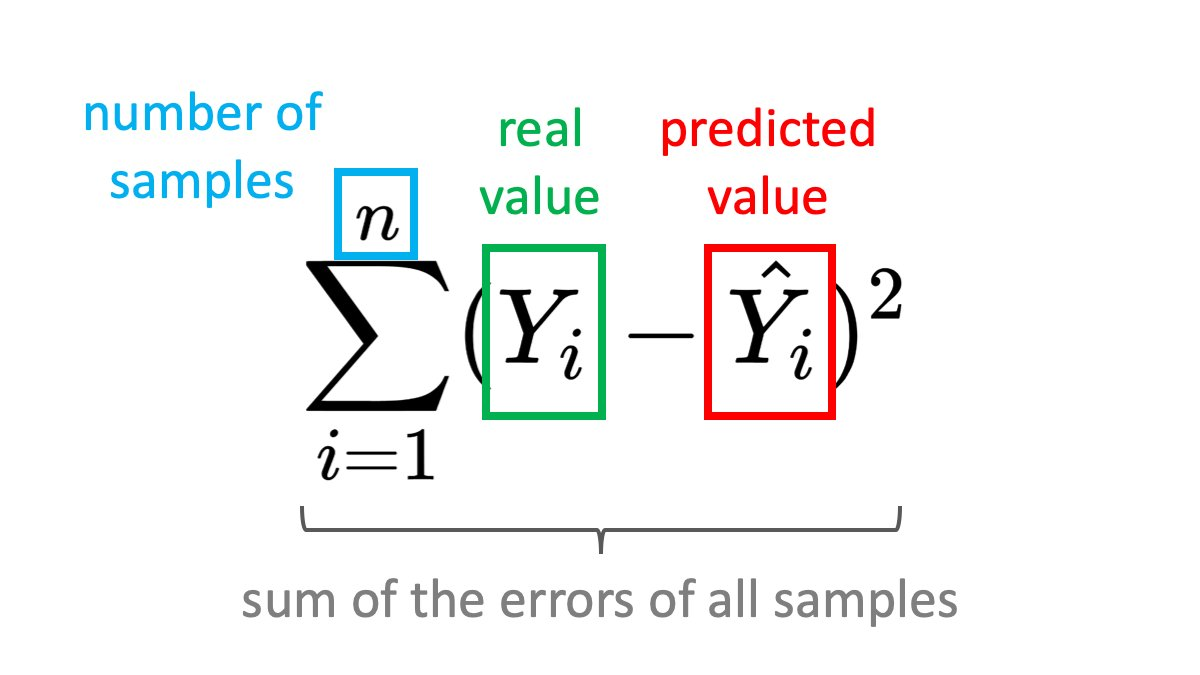

In [96]:
# treina o modelo
reg.fit(X_train_selected, y_train)

LinearRegression()

#### Demonstração do modelo treinado

In [97]:
# Exemplo
df2.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,SQ_METERS,LOCALITY,LATITUDE,LONGITUDE,bairros_1,...,bairros_4,bairros_5,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2,130.0,Manhattan,40.761255,-73.974483,False,...,False,False,False,True,False,False,False,False,False,False
1,Brokered by Sowae Corp,House for sale,260000,4,2,187.0,Staten Island,40.541805,-74.196109,False,...,True,False,False,False,False,True,False,False,False,False
2,Brokered by COMPASS,Condo for sale,69000,3,1,41.0,Manhattan,40.761398,-73.974613,False,...,False,False,False,True,False,False,False,False,False,False
3,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2,203.0,Manhattan,40.809448,-73.946777,False,...,False,False,False,True,False,False,False,False,False,False
4,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1,70.0,The Bronx,40.821586,-73.874089,False,...,False,True,True,False,False,False,False,False,False,False


In [98]:
valor_real_casa3 = df2.iloc[3]['PRICE']
valor_real_casa3

899500

In [99]:
df2_sel = df2[['BATH','SQ_METERS','BEDS']]
casa3 = pd.DataFrame(data = df2_sel.loc[3]).T # T de transposed
casa3

,BATH,SQ_METERS,BEDS
3,2.0,203.0,2.0


In [100]:
valor_estimado_casa3 = reg.predict(casa3)[0]

print(f"O valor real da casa3 é US$ {valor_real_casa3:.2f}")
print(f"O valor estimado da casa3 é US$ {valor_estimado_casa3:.2f}")

O valor real da casa3 é US$ 899500.00
O valor estimado da casa3 é US$ 1337449.62


In [101]:
# Outro exemplo
mansao_do_Richard = pd.DataFrame({'BATH': [5], 'SQ_METERS': [1000], 'BEDS': [6]})

valor_estimado = reg.predict(mansao_do_Richard)[0]

print(f"O valor estimado da mansão do Richard é US$ {valor_estimado :.2f}")

O valor estimado da mansão do Richard é US$ 5236821.22


# Referências
KNN: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

Mapas de NY (Arquivos GIS): https://data.gis.ny.gov/

Gráfico de Waffle: https://python-graph-gallery.com/541-waffle-chart-with-additionnal-grouping/

> Este material foi inspirado pelo conteúdo de Rob Mulla: https://youtu.be/xi0vhXFPegw?si=ZKL3NJZZYYPuNjHP


> Mais tópicos sobre ciência de dados em: https://www.youtube.com/@beedatausp1949


